# Plot distribution of labels in training set

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

data_dirpath = '/data/icwsm2020_tumblr_identity/sample1k/'

# Load feature info
reblog_fpath = os.path.join(data_dirpath, 'feature_tables', 'reblog_features.csv')
reblog_features = pd.read_csv(reblog_fpath)
reblog_train, reblog_test = train_test_split(reblog_features, test_size=0.1, random_state=12345)
print(len(reblog_test))
# print(len(reblog_train))

nonreblog_fpath = os.path.join(data_dirpath, 'feature_tables', 'nonreblog_features.csv')
nonreblog_features = pd.read_csv(nonreblog_fpath)
nonreblog_train, nonreblog_test = train_test_split(nonreblog_features, test_size=0.1, random_state=12345)
print(len(nonreblog_test))
# print(len(nonreblog_train))

# Load gold labels
ranking_fpath = os.path.join(data_dirpath, 'feature_tables', 'ranking_labels.csv')
ranking_labels = pd.read_csv(ranking_fpath).iloc[:len(reblog_features)]
labels_train, labels_test = train_test_split(ranking_labels['ranking_label'], test_size=0.1, random_state=12345)
print(len(labels_test))
# print(len(labels_train))

# nonreblog_test.columns

# Get all rows in training set with unique blog descriptions

rows = []
identity_categories = ['age', 'ethnicity/nationality', 'fandoms', 'gender', 'interests', 'location', 
                       'personality type', 'pronouns', 'relationship status', 'sexual orientation',
                      'zodiac']

# Reblogs
for f in ['follower', 'followee']:
    cols = [f'tumblog_id_{f}'] + [f'{cat}_terms_{f}' for cat in identity_categories]
    rows_to_add = reblog_train[cols].drop_duplicates(subset=[f'tumblog_id_{f}']).values.tolist()
    rows += rows_to_add
    
# NonReblogs
for f in ['follower', 'followee']:
    cols = [f'tumblog_id_{f}'] + [f'{cat}_terms_{f}' for cat in identity_categories]
    rows_to_add = nonreblog_train[cols].drop_duplicates(subset=[f'tumblog_id_{f}']).values.tolist()
    rows += rows_to_add
    
len(rows)

blog_descs_labels = pd.DataFrame(rows, columns=['tumblog_id'] + [f'{cat}_terms' for cat in identity_categories])
blog_descs_labels

# Make dict of category:term:count
from collections import Counter

term_counts = {}

for cat in identity_categories:
    terms_items = blog_descs_labels.loc[blog_descs_labels[f'{cat}_terms'].map(lambda x: len(x) > 2), f'{cat}_terms'].map(lambda x: [t.lower() for t in eval(x)]).tolist()
    terms = [t for l in terms_items for t in l]
    term_counts[cat] = Counter(terms)

term_counts['age']

71267
71267
71267


Counter({'20': 1166,
         '19': 837,
         '24': 456,
         '22': 745,
         '26': 196,
         '18': 1305,
         '37': 24,
         '21': 1024,
         '25': 319,
         '23': 519,
         '30': 158,
         '15': 94,
         '16': 154,
         '17': 362,
         '27': 132,
         '41': 15,
         'age': 697,
         '14': 31,
         'y/o': 85,
         '50': 65,
         'twenty': 150,
         'sixteen': 11,
         '48': 23,
         '10': 96,
         '29': 65,
         '28': 111,
         '40': 80,
         '45': 15,
         '32': 33,
         'nineteen': 27,
         '35': 27,
         '43': 13,
         '12': 17,
         'xxix': 2,
         '11': 30,
         '56': 12,
         '34': 29,
         'seventeen': 19,
         '31': 31,
         'eighteen': 27,
         'xix': 22,
         '36': 17,
         '52': 9,
         '46': 11,
         'xxiv': 7,
         '33': 25,
         '13': 37,
         '53': 9,
         '57': 6,
         '51': 2,
  

In [3]:
# Calculate percentages at certain values
cat = 'age'
values = ['18', '19', '20', '21', '22']
total_count = sum(term_counts[cat].values())
values_count = sum([v for k,v in term_counts[cat].items() if k in values])

print(f'{cat}: {values_count}/{total_count} ({values_count/total_count})')

age: 5077/9456 (0.5369077834179357)


In [4]:
# Calculate percentages at certain values
cat = 'interests'
values = ['art', 'photos', 'draw']
total_count = sum(term_counts[cat].values())
values_count = sum([v for k,v in term_counts[cat].items() if k in values])

print(f'{cat}: {values_count}/{total_count} ({values_count/total_count})')

interests: 4023/13508 (0.2978235119928931)


In [7]:
# Calculate percentages at certain values
cat = 'sexual orientation'
values = ['gay']
total_count = sum(term_counts[cat].values())
values_count = sum([v for k,v in term_counts[cat].items() if k in values])

print(f'{cat}: {values_count}/{total_count} ({values_count/total_count})')

sexual orientation: 1055/3692 (0.28575297941495126)


In [8]:
# Calculate percentages at certain values
cat = 'sexual orientation'
values = ['cishet', 'het', 'hetero', 'straight']
total_count = sum(term_counts[cat].values())
values_count = sum([v for k,v in term_counts[cat].items() if k in values])

print(f'{cat}: {values_count}/{total_count} ({values_count/total_count})')

sexual orientation: 355/3692 (0.09615384615384616)


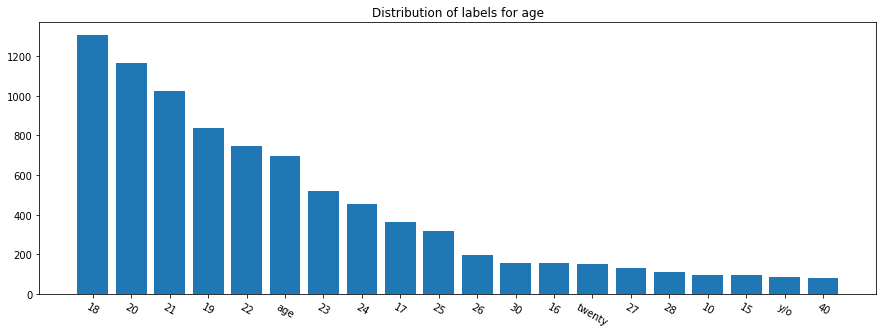

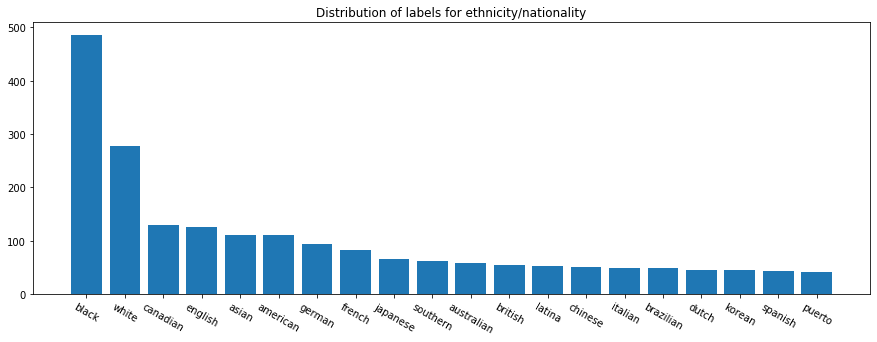

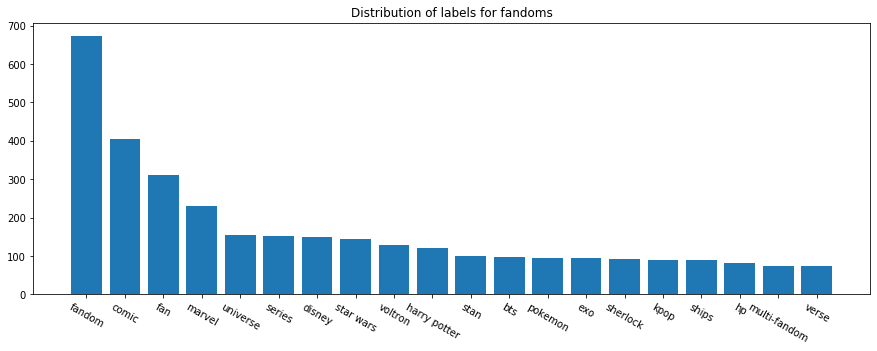

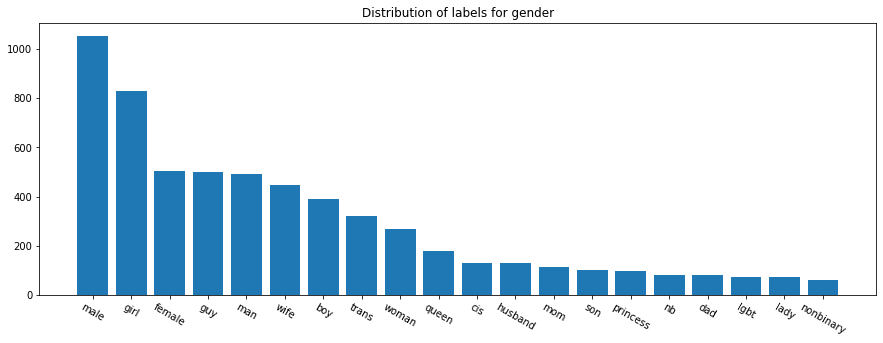

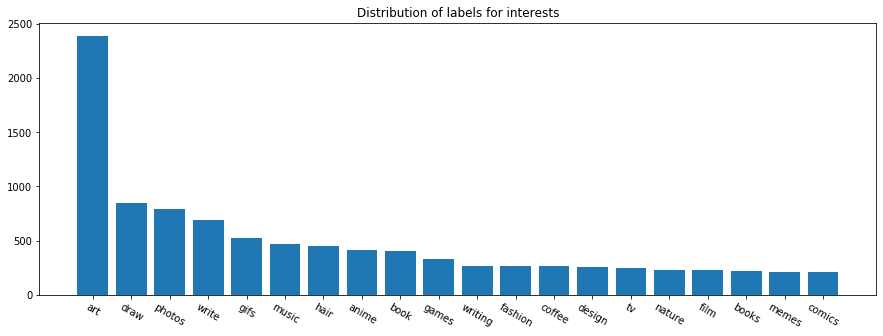

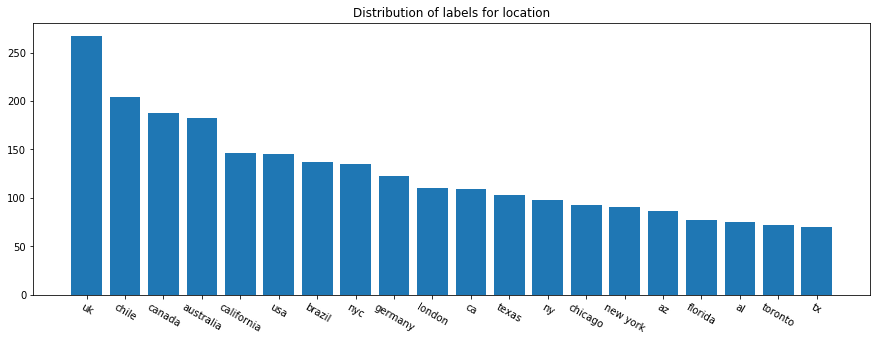

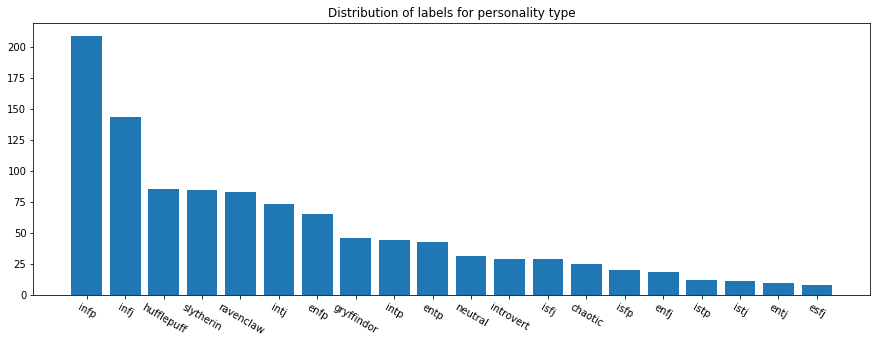

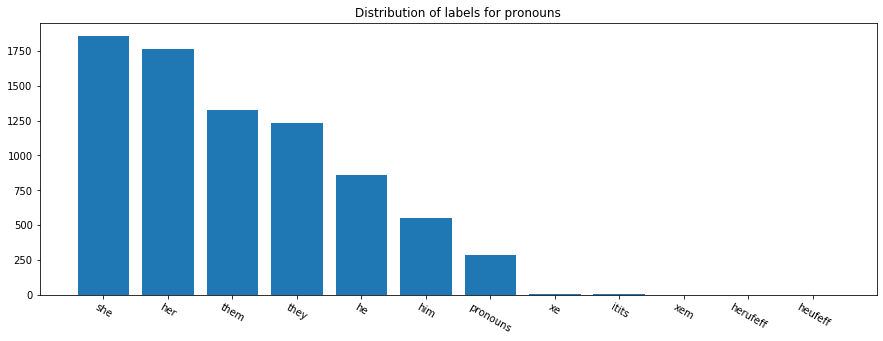

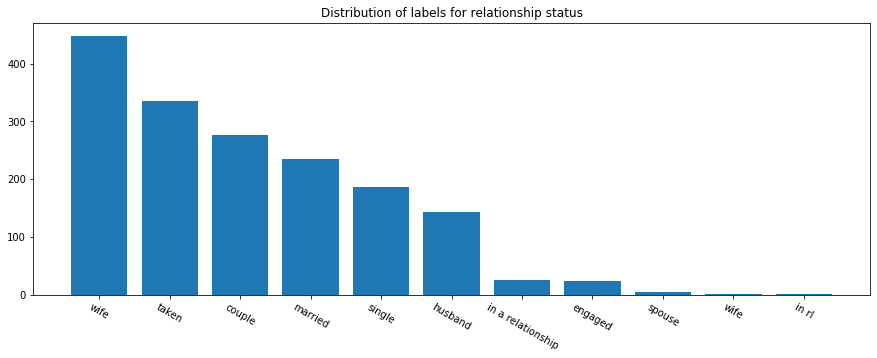

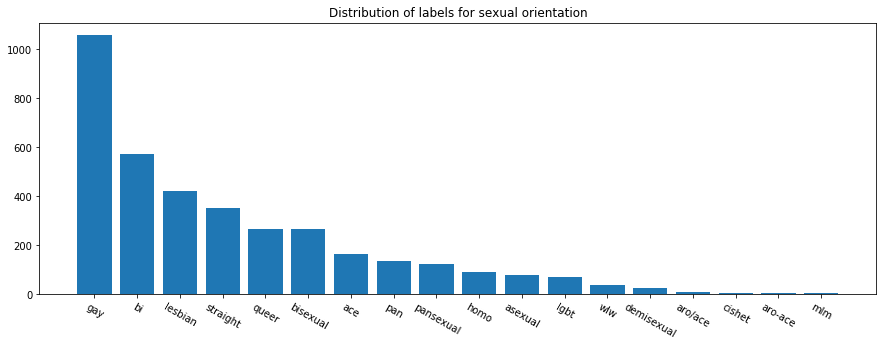

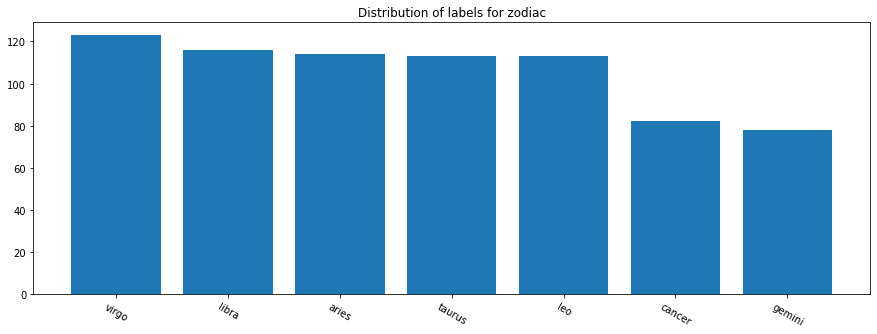

In [28]:
%matplotlib inline

n_labels = 20

import matplotlib.pyplot as plt

for cat in identity_categories:
    labels, values = zip(*term_counts[cat].most_common(n_labels))
    plt.figure(figsize=(15,5))
    plt.title(f"Distribution of labels for {cat}")
    plt.xticks(rotation=-30)
    plt.bar(labels, values)
    plt.savefig(f'/projects/icwsm2020_tumblr_identity/output/label_distros/{cat.replace("/", "_").replace(" ", "_")}.png')

# Compare results on blogs with profile images with blogs without profile images in test set

## Get test set blog names to scrape profile images from

In [15]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

data_dirpath = '/usr2/mamille2/tumblr/data/sample1k/'

# Load feature info
reblog_fpath = os.path.join(data_dirpath, 'feature_tables', 'reblog_features.csv')
reblog_features = pd.read_csv(reblog_fpath)
reblog_train, reblog_test = train_test_split(reblog_features, test_size=0.1, random_state=12345)
print(len(reblog_test))
# print(len(reblog_train))

nonreblog_fpath = os.path.join(data_dirpath, 'feature_tables', 'nonreblog_features.csv')
nonreblog_features = pd.read_csv(nonreblog_fpath)
nonreblog_train, nonreblog_test = train_test_split(nonreblog_features, test_size=0.1, random_state=12345)
print(len(nonreblog_test))
# print(len(nonreblog_train))

# Load gold labels
ranking_fpath = os.path.join(data_dirpath, 'feature_tables', 'ranking_labels.csv')
ranking_labels = pd.read_csv(ranking_fpath).iloc[:len(reblog_features)]
labels_train, labels_test = train_test_split(ranking_labels['ranking_label'], test_size=0.1, random_state=12345)
print(len(labels_test))
# print(len(labels_train))

# nonreblog_test.columns

# Get all tumblog_ids in test set
test_tumblog_ids = set(
    reblog_test['tumblog_id_follower'].tolist() + reblog_test['tumblog_id_followee'].tolist() + nonreblog_test['tumblog_id_follower'].tolist() + nonreblog_test['tumblog_id_followee'].tolist()
)

print(len(test_tumblog_ids))
test_tumblog_ids

71267
71267
71267
21011


{294617088,
 1,
 212828162,
 80412676,
 195919877,
 339804166,
 223674373,
 184320008,
 98959367,
 77791237,
 118095876,
 139624457,
 205783053,
 106823692,
 74317835,
 33882133,
 49315863,
 250970136,
 214564889,
 50987033,
 35356699,
 415334430,
 284229664,
 13041697,
 328826913,
 162529313,
 426541089,
 15106086,
 423985190,
 786472,
 159383599,
 99516464,
 294256688,
 8060975,
 15564852,
 174522426,
 83722298,
 9470012,
 50331708,
 267026494,
 322011198,
 136937536,
 336330815,
 434995266,
 41189442,
 157417539,
 195855774,
 195166278,
 243990599,
 328433735,
 132874315,
 166035532,
 53936205,
 194379851,
 229146701,
 238321749,
 237404249,
 380403802,
 56131678,
 150732896,
 403964000,
 79954018,
 64454755,
 425066597,
 41910374,
 432701542,
 78643302,
 377159785,
 167215210,
 169771112,
 262209639,
 252510317,
 102301806,
 339804271,
 104366191,
 168624241,
 162660465,
 233275506,
 179508418,
 89882742,
 163512440,
 125960312,
 169115771,
 289964156,
 322076797,
 43319422,
 13484

### Match tumblog IDs with names

In [11]:
# Load reblog info
reblog_info = pd.read_csv('/usr2/mamille2/tumblr/data/sample1k/reblogs_descs_annotated/reblogs_descs.tsv', sep='\t')
reblog_info.columns

Index(['blog_description_followee', 'blog_name_followee',
       'blog_title_followee', 'blog_url_followee', 'is_group_blog_followee',
       'is_private_followee', 'created_time_epoch_followee',
       'updated_time_epoch_followee', 'timezone_followee', 'language_followee',
       ...
       'interests_terms_followee', 'location_terms_followee',
       'personality type_terms_followee', 'pronouns_terms_followee',
       'relationship status_terms_followee', 'roleplay_terms_followee',
       'roleplay/fandoms_terms_followee', 'sexual orientation_terms_followee',
       'weight_terms_followee', 'zodiac_terms_followee'],
      dtype='object', length=104)

In [ ]:
# Load nonreblog_info
from tqdm import tqdm_notebook as tqdm

nonreblog_info_dfs = []
selected_columns = ['tumblog_id_follower', 'tumblog_id_followee', 'blog_name_follower', 'blog_name_followee']
# for i in range(999):
parent_dirpath = '/usr2/mamille2/tumblr/data/sample1k/nonreblogs_descs_match/'

for fname in tqdm(os.listdir(parent_dirpath)):
    fpath = os.path.join(parent_dirpath, fname)
    nonreblog_info_dfs.append(pd.read_csv(fpath, sep='\t').loc[:, selected_columns])
nonreblog_info = pd.concat(nonreblog_info_dfs)
nonreblog_info.columns

nonreblog_info.to_pickle('/data/icwsm2020_tumblr_identity/tmp/nonreblog_info.pkl')

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,13,18,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,9,10,27) have mixed types. Specify dtype option on import or set low_memory=Fal

In [9]:
# Load pickle
import pandas as pd

nonreblog_info = pd.read_pickle('/data/icwsm2020_tumblr_identity/tmp/nonreblog_info.pkl')
print(nonreblog_info.columns)
len(nonreblog_info)

Index(['tumblog_id_follower', 'tumblog_id_followee', 'blog_name_follower',
       'blog_name_followee'],
      dtype='object')


30765997

In [12]:
# Select blog names from test blog IDs
selected_columns = ['tumblog_id_follower', 'tumblog_id_followee', 'blog_name_follower', 'blog_name_followee']
concatenated = pd.concat([reblog_info[selected_columns], nonreblog_info])

In [13]:
blog_ids_names = pd.DataFrame()
blog_ids_names['tumblog_id'] = concatenated['tumblog_id_follower'].tolist() + concatenated['tumblog_id_followee'].tolist()
blog_ids_names['blog_name'] = concatenated['blog_name_follower'].astype(str).tolist() + concatenated['blog_name_followee'].astype(str).tolist()
# len(blog_ids_names)

blog_ids_names.drop_duplicates(inplace=True)
len(blog_ids_names)

83276

In [41]:
# Check that intersect
print(len(test_tumblog_ids))
len(test_tumblog_ids.intersection(set(blog_ids_names['tumblog_id'].tolist())))
# len(test_tumblog_ids.intersection(set(reblog_info['tumblog_id_follower'].tolist())))

21011


21011

In [14]:
blogid2name = blog_ids_names.set_index('tumblog_id')['blog_name'].to_dict()
blogid2name

blogname2id = {val: key for key, val in blogid2name.items()}

In [43]:
# Check that intersect
print(len(test_tumblog_ids))
len(test_tumblog_ids.intersection(set(blogid2name.keys())))

21011


21011

In [44]:
# Lookup test tumblog ids

test_blog_names = [blogid2name[tid] for tid in test_tumblog_ids]
len(test_blog_names)

21011

In [45]:
# Save test set blog names out

outpath = '/data/icwsm2020_tumblr_identity/test_set_blog_names.txt'
with open(outpath, 'w') as f:
    for name in test_blog_names:
        f.write(f'{name}\n')

# Separate accuracies for blogs with profile images, without profile images

In [1]:
path = '/data/icwsm2020_tumblr_identity/test_set_blog_names.txt'

with open(path) as f:
    test_blog_names = f.read().splitlines()
    
# len(test_blog_names)

import os

# num_scraped = 1000
# attempted = test_blog_names[:num_scraped]
attempted = test_blog_names

images_dirpath = '/data/icwsm2020_tumblr_identity/profile_images/test_set/'
have_nondefault_image = [os.path.splitext(fname)[0] for fname in os.listdir(images_dirpath)]
print(len(have_nondefault_image))
# print(have_nondefault_image[:10])

default_no_image = [name for name in attempted if name not in have_nondefault_image]
print(len(default_no_image))

12327
8683


## Load test set instances, find number of profile images for 2 followees in each instance

In [3]:
import numpy as np

final_preds_fpath = '/usr2/mamille2/tumblr/data/sample1k/output/predictions/lr_labels_baseline+exp1+exp2_all_test_preds.txt'
final_preds = np.loadtxt(final_preds_fpath)
final_preds.shape

(71267,)

In [6]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

data_dirpath = '/usr2/mamille2/tumblr/data/sample1k/'

# Load feature info
reblog_fpath = os.path.join(data_dirpath, 'feature_tables', 'reblog_features.csv')
reblog_features = pd.read_csv(reblog_fpath)
reblog_train, reblog_test = train_test_split(reblog_features, test_size=0.1, random_state=12345)
print(len(reblog_test))
# print(len(reblog_train))

nonreblog_fpath = os.path.join(data_dirpath, 'feature_tables', 'nonreblog_features.csv')
nonreblog_features = pd.read_csv(nonreblog_fpath)
nonreblog_train, nonreblog_test = train_test_split(nonreblog_features, test_size=0.1, random_state=12345)
print(len(nonreblog_test))
# print(len(nonreblog_train))

# Load gold labels
ranking_fpath = os.path.join(data_dirpath, 'feature_tables', 'ranking_labels.csv')
ranking_labels = pd.read_csv(ranking_fpath).iloc[:len(reblog_features)]
labels_train, labels_test = train_test_split(ranking_labels['ranking_label'], test_size=0.1, random_state=12345)
print(len(labels_test))
# print(len(labels_train))

# nonreblog_test.columns

# Get all tumblog_ids in test set
test_tumblog_ids = set(
    reblog_test['tumblog_id_follower'].tolist() + reblog_test['tumblog_id_followee'].tolist() + nonreblog_test['tumblog_id_follower'].tolist() + nonreblog_test['tumblog_id_followee'].tolist()
)

print(len(test_tumblog_ids))
# test_tumblog_ids

71267
71267
71267
21011


In [12]:
import pickle

with open('/data/icwsm2020_tumblr_identity/tmp/blogid2name.pkl', 'wb') as f:
    pickle.dump(blogid2name, f)
with open('/data/icwsm2020_tumblr_identity/tmp/blogname2id.pkl', 'wb') as f:
    pickle.dump(blogname2id, f)

In [13]:
# Build dataset
from tqdm import tqdm_notebook as tqdm

lines = []
header = ['actual_label', 'final_pred', 'n_blogs_profile_images']
for i in tqdm(range(len(reblog_test))):
    actual_label = labels_test.iloc[i]
    final_pred = final_preds[i]
    
    follower_name = blogid2name[reblog_test.iloc[i]['tumblog_id_follower']]
    reblog_followee_name = blogid2name[reblog_test.iloc[i]['tumblog_id_followee']]
    nonreblog_followee_name = blogid2name[nonreblog_test.iloc[i]['tumblog_id_followee']]
    
    if not (follower_name in attempted and reblog_followee_name in attempted and nonreblog_followee_name in attempted):
        continue
        
    n_blogs_profile_images = sum(1 for name in [follower_name, reblog_followee_name, nonreblog_followee_name] if name in have_nondefault_image)
    lines.append([actual_label, final_pred, n_blogs_profile_images])
    
preds_tags = pd.DataFrame(lines, columns=header)
print(len(preds_tags))
print(preds_tags.columns)


71267
Index(['actual_label', 'final_pred', 'n_blogs_profile_images'], dtype='object')


In [14]:
splits = {}

for n in range(4):
    
    splits[n] = preds_tags[preds_tags['n_blogs_profile_images']==n]
    print(f"{n}: {len(splits[n])} ({len(splits[n])/len(preds_tags):.1%})")

0: 17500 (24.6%)
1: 10590 (14.9%)
2: 18734 (26.3%)
3: 24443 (34.3%)


In [15]:
# Accuracy for each group

accuracies = {}

# Final
accuracies['final'] = {}
for n in range(4):
    accuracies['final'][n] = sum(splits[n]['actual_label'] == splits[n]['final_pred'])/len(splits[n])
    print(f"{n}: {accuracies['final'][n]}")

0: 0.7350857142857142
1: 0.7357884796978281
2: 0.753122664673855
3: 0.750357975698564


## Load test set instances, find number of profile images for 3 users in each instance

In [6]:
import numpy as np

final_preds_fpath = '/usr2/mamille2/tumblr/data/sample1k/output/predictions/lr_labels_baseline+exp1+exp2_all_test_preds.txt'
final_preds = np.loadtxt(final_preds_fpath)
final_preds.shape

(71267,)

In [2]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

data_dirpath = '/usr2/mamille2/tumblr/data/sample1k/'

# Load feature info
reblog_fpath = os.path.join(data_dirpath, 'feature_tables', 'reblog_features.csv')
reblog_features = pd.read_csv(reblog_fpath)
reblog_train, reblog_test = train_test_split(reblog_features, test_size=0.1, random_state=12345)
print(len(reblog_test))
# print(len(reblog_train))

nonreblog_fpath = os.path.join(data_dirpath, 'feature_tables', 'nonreblog_features.csv')
nonreblog_features = pd.read_csv(nonreblog_fpath)
nonreblog_train, nonreblog_test = train_test_split(nonreblog_features, test_size=0.1, random_state=12345)
print(len(nonreblog_test))
# print(len(nonreblog_train))

# Load gold labels
ranking_fpath = os.path.join(data_dirpath, 'feature_tables', 'ranking_labels.csv')
ranking_labels = pd.read_csv(ranking_fpath).iloc[:len(reblog_features)]
labels_train, labels_test = train_test_split(ranking_labels['ranking_label'], test_size=0.1, random_state=12345)
print(len(labels_test))
# print(len(labels_train))

# nonreblog_test.columns

# Get all tumblog_ids in test set
test_tumblog_ids = set(
    reblog_test['tumblog_id_follower'].tolist() + reblog_test['tumblog_id_followee'].tolist() + nonreblog_test['tumblog_id_follower'].tolist() + nonreblog_test['tumblog_id_followee'].tolist()
)

print(len(test_tumblog_ids))
# test_tumblog_ids

71267
71267
71267
21011


In [3]:
# Load pickled info
import pickle

nonreblog_info = pd.read_pickle('/data/icwsm2020_tumblr_identity/tmp/nonreblog_info.pkl')
# print(nonreblog_info.columns)
# len(nonreblog_info)

with open('/data/icwsm2020_tumblr_identity/tmp/blogid2name.pkl', 'rb') as f:
    blogid2name = pickle.load(f)
with open('/data/icwsm2020_tumblr_identity/tmp/blogname2id.pkl', 'rb') as f:
    blogname2id = pickle.load(f)

In [8]:
# Build dataset
from tqdm import tqdm_notebook as tqdm

lines = []
header = ['actual_label', 'final_pred', 'n_followee_profile_images']

for i in tqdm(range(len(reblog_test))):
    actual_label = labels_test.iloc[i]
    final_pred = final_preds[i]
    
#     follower_name = blogid2name[reblog_test.iloc[i]['tumblog_id_follower']]
    reblog_followee_name = blogid2name[reblog_test.iloc[i]['tumblog_id_followee']]
    nonreblog_followee_name = blogid2name[nonreblog_test.iloc[i]['tumblog_id_followee']]
    
#     if not (follower_name in attempted and reblog_followee_name in attempted and nonreblog_followee_name in attempted):
#     if not (reblog_followee_name in attempted and nonreblog_followee_name in attempted):
#         n_instances_skipped += 1
#         continue
        
    #n_blogs_profile_images = sum(1 for name in [follower_name, reblog_followee_name, nonreblog_followee_name] if name in have_nondefault_image)
    n_blogs_profile_images = sum(1 for name in [reblog_followee_name, nonreblog_followee_name] if name in have_nondefault_image)
    lines.append([actual_label, final_pred, n_blogs_profile_images])
    
preds_tags = pd.DataFrame(lines, columns=header)
print(len(preds_tags))
print(preds_tags.columns)


71267
Index(['actual_label', 'final_pred', 'n_followee_profile_images'], dtype='object')


In [11]:
splits = {}

for n in range(3):
    
    splits[n] = preds_tags[preds_tags['n_followee_profile_images']==n]
    print(f"{n}: {len(splits[n])} ({len(splits[n])/len(preds_tags):.1%})")

0: 19692 (27.6%)
1: 20151 (28.3%)
2: 31424 (44.1%)


In [13]:
# Accuracy for each group

accuracies = {}

# Final
accuracies['final'] = {}
for n in range(3):
    accuracies['final'][n] = sum(splits[n]['actual_label'] == splits[n]['final_pred'])/len(splits[n])
    print(f"{n}: {accuracies['final'][n]}")

0: 0.7315153361771277
1: 0.7516252295171455
2: 0.7495863034623218


In [22]:
matches = splits[0]['actual_label']==splits[0]['final_pred']
matches.values

array([ True,  True,  True, ..., False,  True, False])

In [23]:
# T-test between means

from scipy.stats import ttest_ind

matches = splits[0]['actual_label']==splits[0]['final_pred']
baseline = matches.values

for i in range(1,3):
    matches = splits[i]['actual_label']==splits[i]['final_pred']
    tested = matches.values
    print(f'Significance {i}: {ttest_ind(baseline, tested)}')

Significance 1: Ttest_indResult(statistic=-4.586133816345967, pvalue=4.529013926785877e-06)
Significance 2: Ttest_indResult(statistic=-4.548726548924355, pvalue=5.409537574588784e-06)


# Stats on providing blog description, profile image

In [3]:
import pandas as pd

# Load 1m data

blog_data_fpath = '/data/icwsm2020_tumblr_identity/icwsm2020_blogs_1m.csv'
# blog_info = pd.read_csv(blog_data_fpath, escapechar='\\', engine='python', encoding='utf8', error_bad_lines=False)
blog_info = pd.read_csv(blog_data_fpath)
print(blog_info.columns)
print(len(blog_info))

Skipping line 119458: Expected 14 fields in line 119458, saw 27
Skipping line 148688: Expected 14 fields in line 148688, saw 27
Skipping line 156335: Expected 14 fields in line 156335, saw 27
Skipping line 230847: Expected 14 fields in line 230847, saw 27
Skipping line 242074: Expected 14 fields in line 242074, saw 27
Skipping line 307609: Expected 14 fields in line 307609, saw 27
Skipping line 360570: Expected 14 fields in line 360570, saw 27
Skipping line 379222: Expected 14 fields in line 379222, saw 27
Skipping line 384288: Expected 14 fields in line 384288, saw 27
Skipping line 472072: Expected 14 fields in line 472072, saw 27
Skipping line 472845: Expected 14 fields in line 472845, saw 27
Skipping line 479855: Expected 14 fields in line 479855, saw 27
Skipping line 503662: Expected 14 fields in line 503662, saw 27
Skipping line 539319: Expected 14 fields in line 539319, saw 27
Skipping line 554024: Expected 14 fields in line 554024, saw 27
Skipping line 662068: Expected 14 fields

Index(['tumblog_id', 'tumblr_blog_name', 'tumblr_blog_title',
       'tumblr_blog_url', 'is_group_blog', 'is_primary', 'created_time_epoch',
       'updated_time_epoch', 'timezone', 'language', 'blog_classifier',
       'reblog_count_2018-06-01/2018-11-30', 'has_blog_description',
       'processed_blog_description'],
      dtype='object')
1000624


In [4]:
# Load profile image info

profile_image_info_fpath = '/projects/icwsm2020_tumblr_identity/output/scrape_info_2019-08-21T0013.txt'

with open(profile_image_info_fpath) as f:
    lines = f.read().splitlines()
    default_start_idx = lines.index('Blog names with default images:')
    image_start_idx = lines.index('Blog names with other images:')
    blognames_default = lines[default_start_idx+1: image_start_idx-1]
    blognames_image = lines[image_start_idx+1:]
    
print(len(blognames_default))
print(len(blognames_image))

283
717


In [7]:
from tqdm import tqdm_notebook as tqdm

def annotate_blog_info(blogname):
    if blogname in blognames_default:
        return 'default'
    elif blogname in blognames_image:
        return 'image'
    else:
        return ''

blog_info['profile_image'] = [annotate_blog_info(name) for name in tqdm(blog_info['tumblr_blog_name'].tolist())]
len(blog_info[blog_info['profile_image']=='default'])

283

In [8]:
with_profile_image = blog_info[blog_info['profile_image']!='']
len(with_profile_image)

1000

In [20]:
# Stats on profile image/blog description
blognames_with_descriptions = set(with_profile_image.loc[with_profile_image['has_blog_description']=='true', 'tumblr_blog_name'])
blognames_with_images = set(with_profile_image.loc[with_profile_image['profile_image']=='image', 'tumblr_blog_name'])

intersect = blognames_with_descriptions.intersection(blognames_with_images)
both = len(intersect)
desc_only = len(blognames_with_descriptions - intersect)
image_only = len(blognames_with_images - intersect)
# print(f"Have descriptions: {len(blognames_with_descriptions)}")
# print(f"Have images: {len(blognames_with_images)}")
print(f"Just descriptions: {desc_only}")
print(f"Just images: {image_only}")
print(f"Both description and image: {both}")

Just descriptions: 120
Just images: 179
Both description and image: 538


In [24]:
# Calculate correlation
from scipy.stats import pearsonr

has_description = [1 if val == 'true' else 0 for val in with_profile_image['has_blog_description'].tolist()]
has_image = [1 if val == 'image' else 0 for val in with_profile_image['profile_image'].tolist()]

pearsonr(has_description, has_image)

(0.3098639330864374, 1.0749575488859195e-23)

In [25]:
blog_info.columns

Index(['tumblog_id', 'tumblr_blog_name', 'tumblr_blog_title',
       'tumblr_blog_url', 'is_group_blog', 'is_primary', 'created_time_epoch',
       'updated_time_epoch', 'timezone', 'language', 'blog_classifier',
       'reblog_count_2018-06-01/2018-11-30', 'has_blog_description',
       'processed_blog_description', 'profile_image'],
      dtype='object')

In [26]:
blog_info.to_csv(blog_data_fpath, index=False)

# Sample 500 blog names from dataset 

In [3]:
import os
import pandas as pd

# Load reblog prediction dataset

data_dirpath = '/usr2/mamille2/tumblr/data/sample1k/'

reblog_fpath = os.path.join(data_dirpath, 'reblogs_descs_annotated', 'reblogs_descs.tsv')
reblogs = pd.read_table(reblog_fpath)
print(len(reblogs))
reblogs.columns

153090


Index(['blog_description_followee', 'blog_name_followee',
       'blog_title_followee', 'blog_url_followee', 'is_group_blog_followee',
       'is_private_followee', 'created_time_epoch_followee',
       'updated_time_epoch_followee', 'timezone_followee', 'language_followee',
       ...
       'interests_terms_followee', 'location_terms_followee',
       'personality type_terms_followee', 'pronouns_terms_followee',
       'relationship status_terms_followee', 'roleplay_terms_followee',
       'roleplay/fandoms_terms_followee', 'sexual orientation_terms_followee',
       'weight_terms_followee', 'zodiac_terms_followee'],
      dtype='object', length=104)

In [6]:
blognames = reblogs['blog_name_followee'].tolist() + reblogs['blog_name_follower'].tolist()
len(blognames)

306180

In [11]:
from tqdm import tqdm_notebook as tqdm

nonreblog_fnames = os.listdir(os.path.join(data_dirpath, 'nonreblogs_descs_match'))
for fname in tqdm(nonreblog_fnames):
    fpath = os.path.join(data_dirpath, 'nonreblogs_descs_match', fname)
    nonreblogs = pd.read_table(fpath)
    blognames += nonreblogs['blog_name_followee'].tolist() + nonreblogs['blog_name_follower'].tolist()
    
len(blognames)

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,13,18,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr0/home/mamille2/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr0/home/mamille2/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,9,10,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=c

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9,10,13,27,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (18,27,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,9,10,13,27,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,6,49) have mixed types. Specify dtype option on import or s

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,13,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,18,21,22,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,6,21,22,27,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (21,22,27) have mixed types. Specify dtype option on import or 

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,18,21,22,27,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,9,10,13,27,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,3,6,9,10,13,27,29,31,42,43,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,13,18,48,49) have mixed t

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9,10,13,18,27,31,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,6,13,18,27,31,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,6,13,27,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9,10,27,42,43) have mixed types. Specify dtyp

67043234

In [13]:
with open(os.path.join(data_dirpath, 'blognames.txt'), 'w') as f:
    for blogname in blognames:
        f.write(f'{blogname}\n')

In [19]:
import random

# Random sample of 500 unique blog names, weighted by probability in data

selection = set()

while len(selection) < 1000:
    choice = random.choice(blognames)
    if not choice in selection:
        selection.add(choice)
        
len(selection)

1000

In [18]:
sorted(selection)[:20]

['123-tamarindo',
 '1998life-dream',
 '260to120thinspo',
 '666miss-u',
 'abrandarei',
 'absolutelynothingjustforgetit',
 'adultvideosclub',
 'alejandrard',
 'alexanderuhoton',
 'alexsorange',
 'aliceisinlesbianwonderlandagain',
 'alienpicnic',
 'allo-mishamigos',
 'allthingseurope',
 'alotofshittypeople',
 'amargedom',
 'amazinglybeautifulphotography',
 'amber2horny',
 'ambiguities',
 'amy-ambrosio']